In [1]:
from INCMD import INCMD

import numpy as np
import matplotlib.pyplot as plt

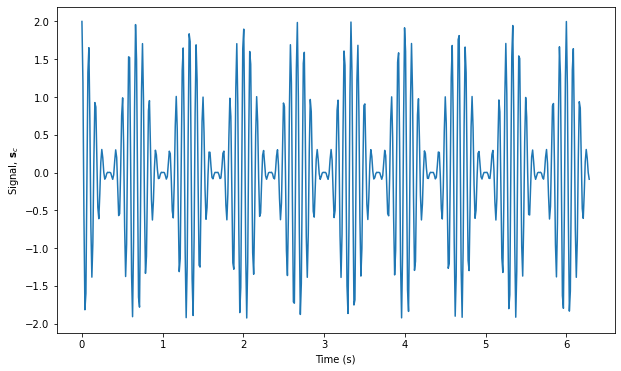

In [2]:
# Fabricate a test signal
t = np.linspace(0,2*np.pi, 512)

amp = 1 + np.cos(3*np.pi*t)
omega = 12

signal = amp*np.cos(2*np.pi*omega*t)

#Plot the signal
plt.figure(figsize=(10,6))
plt.plot(t, signal)
plt.ylabel(r"Signal, $\mathbf{s}_c$")
plt.xlabel("Time (s)")
plt.show()

In [3]:
%%time
incmd = INCMD(signal, t, iters=3000, rho=0.1, mu=1e-5, tol=1e-8)
f_bars, gs, g_d1s, g_d2s = incmd.decompose(modes=1)

Wall time: 107 ms


In [4]:
# Pull out the results for the single mode
f_bar = f_bars[0]
g = gs[0]

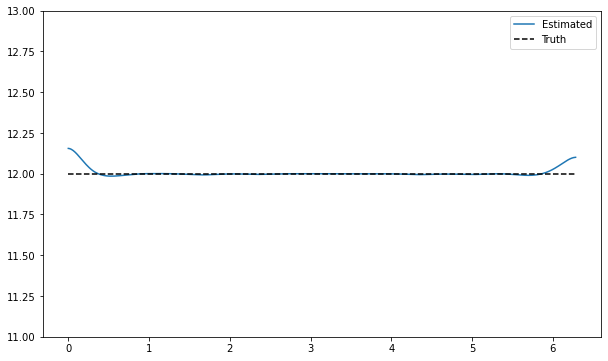

In [5]:
IFs = np.gradient(omega*t, t)

plt.figure(figsize=(10,6))
plt.plot(t, f_bar, label='Estimated')
plt.plot(t, IFs, '--k', label='Truth')
mean_tf = np.mean(IFs)
plt.ylim([mean_tf-1, mean_tf+1])
plt.legend()
plt.show()

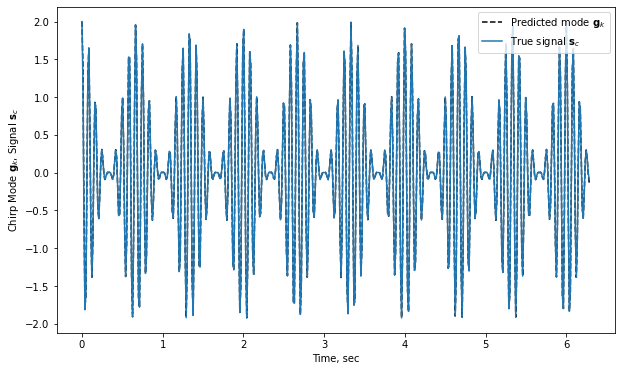

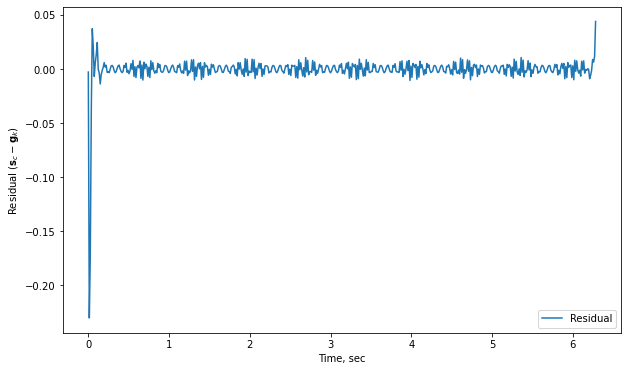

In [6]:
plt.figure(figsize=(10,6))
plt.plot(t, g, '--k', label=r'Predicted mode $\mathbf{g}_k$')
plt.plot(t, signal, label=r'True signal $\mathbf{s}_c$')
plt.ylabel(r"Chirp Mode $\mathbf{g}_k$, Signal $\mathbf{s}_c$")
plt.xlabel('Time, sec')
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(t, signal-g, label='Residual')
plt.ylabel(r'Residual ($\mathbf{s}_c-\mathbf{g}_k$)')
plt.xlabel('Time, sec')
plt.legend()
plt.show()